In [69]:
using Revise, DataFrames, Glob, Random, Pipe, ProgressMeter, CSV, Plots
cd("/Users/frankiecho/Documents/Github/lds-mc-julia")
include("code/functions/type-defs.jl")
include("code/functions/optim-functions.jl");
include("code/functions/expected-utility-functions.jl")
include("code/functions/sim-landscape-functions.jl")
include("code/functions/mc-sim-functions.jl")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-27


Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-27
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-27
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-27


fcn_save_results (generic function with 1 method)

# Generate a simulated landscape

In [70]:
L = fcn_generate_landscape((40,40), n_shocks=1000)

Landscape((40, 40), [0.0 104.52252803828742 … 10.756474683410314 38.042522393562884; 254.1178593935919 130.52512576304616 … 0.0 86.25721859299802; … ; 0.0 183.7738449266669 … 130.78581533413364 38.08308767332208; 0.0 79.21725786298371 … 73.82717043943086 235.6243812751608], [0.0 104.52252803828742 … 10.756474683410314 38.042522393562884; 254.1178593935919 130.52512576304616 … 85.66836336671047 86.25721859299802; … ; 0.0 183.7738449266669 … 130.78581533413364 38.08308767332208; 0.0 79.21725786298371 … 73.82717043943086 235.6243812751608], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 1.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.07777651495919842 … 2.623153961524398e-5 2.556755915818489e-5; 0.0718269156902841 0.0 … 2.4853604045081004e-5 2.4224929406503907e-5; … ; 2.4224929406503897e-5 2.4853604045080994e-5 … 0.0 0.07182691569028407; 2.5567559158184884e-5 2.6231539615243975e-5 … 0.07777651495919839 0.0], [2.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 1.0  …  1.0, 0.0, 1.0, 3.0, 1.0, 0.0, 4.0

In [12]:
L.R .< 0

1600×1601 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱     ⋮              ⋮              ⋮
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     

In [71]:
# Write CSV for plotting in R
CSV.write("output/shock_df.csv", L.shock_df)
CSV.write("output/nss.csv", DataFrame(s = 1:size(L.R, 2), nss = L.nss))

"output/nss.csv"

In [72]:
large_shock = L.shock_df[L.shock_df.shock_size .> 20,:]
s = large_shock[(L.nss[large_shock.s] .> 3),:].s[1]
rv = vec(L.RV[:,s])
sl = vec(L.SS[:,s])
r = vec(L.R[:,s])
so = L.shock_df[L.shock_df.s .== s,:]
so_bit = zeros(size(L.R,1))
so_bit[so.shock_loc] .= 1
so_bit = vec(so_bit)
dims = (40,40)
x_col = repeat(1:dims[1], inner=dims[2])
y_col = repeat(1:dims[1], outer=dims[2])
shock_write_df = DataFrame(x = x_col, y = y_col, rv = rv, sl = sl, r = r, so = so_bit)
CSV.write("output/shock_heatmap_df.csv", shock_write_df)

"output/shock_heatmap_df.csv"

Visualise results for different realisations of spatial AR process

In [73]:

yy = 0;
S = 100;
W, P, b, D = fcn_spatial_weights(dims; boundary = 1, distance = true, bandwidth = 40,  α=2);
X = rand(Normal(10,50), size(W,1))
Wp   = fcn_spatial_AR(W, S; X = X, γ=0.5, θ=0.1, σ=5) .+ yy;
Wp = Wp[b .== 0, :];
Wp[Wp .< 0] .= 0;

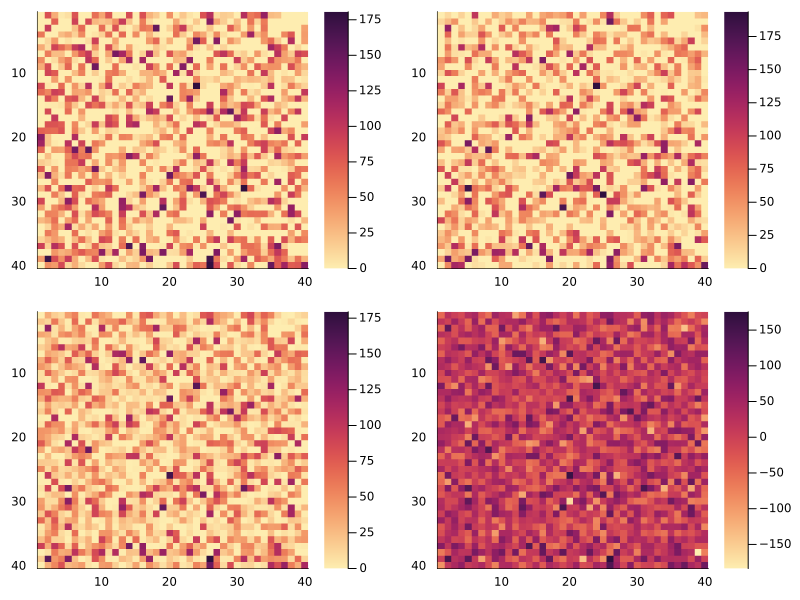

In [74]:
fcn_plot_heatmap = D -> D |> (x->fcn_reshape_lds(x, dims)) |>d->Plots.heatmap(d; colorbar=:best, yflip=true, dpi =600, size=(750,750), c = cgrad(:matter));
p1 = fcn_plot_heatmap(Wp[:,1])
p2 = fcn_plot_heatmap(Wp[:,2])
p3 = fcn_plot_heatmap(mean(Wp, dims=2))
p4 = fcn_plot_heatmap(X[b .== 0])
plot(p1,p2,p3,p4,layout=(2,2),size=(800,600))


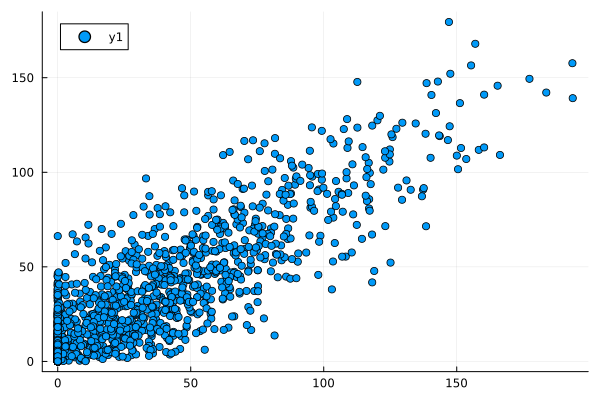

In [75]:
plot(Wp[:,2], mean(Wp, dims=2), seriestype = :scatter)

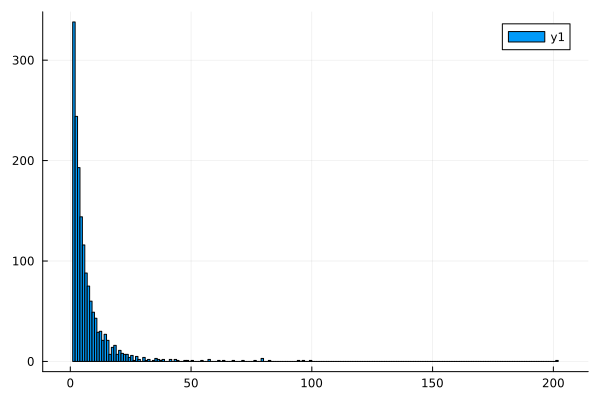

In [76]:
a = [];
histogram(L.shock_df.shock_size)
#map(Vector(L.ss'), (v) -> push!(a, v))

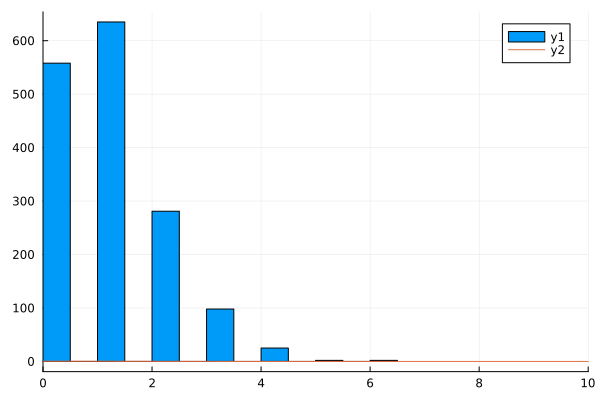

In [77]:
using StatsPlots
dist = Binomial(1600, 1/1600)
#p = histogram(L.nss)
#plot!(p, dist)
pdf_y = map(x->pdf(dist,x), 0:1:100)
p = histogram(L.nss, mode = :density)
plot!(p, 0:1:100, pdf_y, xlims = (0,10))

In [78]:
dims = (40,40)
W, P, b, D = fcn_spatial_weights(dims; boundary = 1, distance = true, bandwidth = 20,  α=2);
W = W[b .== 0, b .== 0]

1600×1600 SparseMatrixCSC{Float64, Int64} with 1235740 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣷⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀
⢽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄
⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣗
⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⢿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿

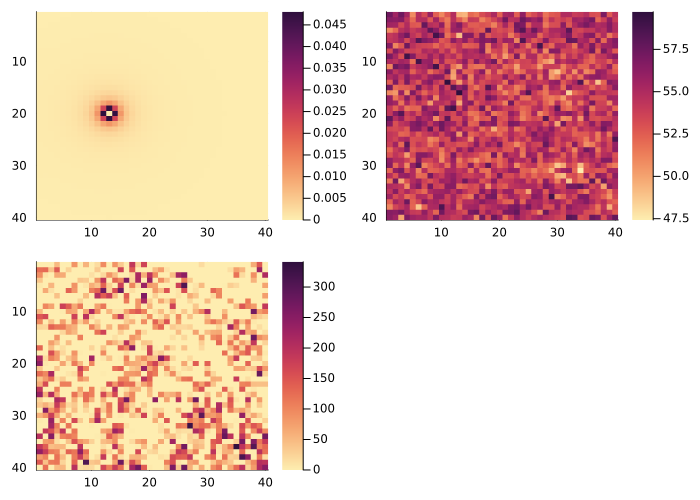

In [79]:
p1 = fcn_plot_heatmap(Vector(W[:, 500]));
p2 = fcn_plot_heatmap(mean(L.RV, dims = 2))
p3 = fcn_plot_heatmap(Vector(L.RV[:,10]));
Plots.plot(p1, p2, p3, size=(700,500), layout = (2,2))

In [80]:
out_mat = hcat(repeat(1:dims[1], inner=dims[2]), repeat(1:dims[1], outer=dims[2]), Vector(W[:, 500]), mean(L.RV, dims = 2), Vector(L.RV[:,10]));
out_tab = DataFrame(out_mat, :auto)
rename!(out_tab, :x1 => :x, :x2 => :y)
CSV.write("output/spatial_weights.csv", out_tab)

"output/spatial_weights.csv"

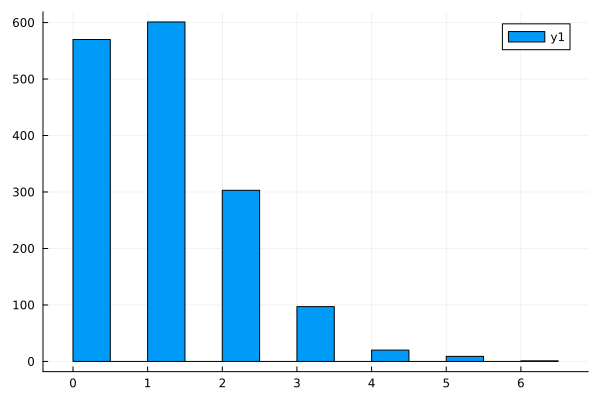

In [81]:
using Distributions, Plots, StatsPlots

L = fcn_generate_landscape(yy = 10)
histogram(L.nss)


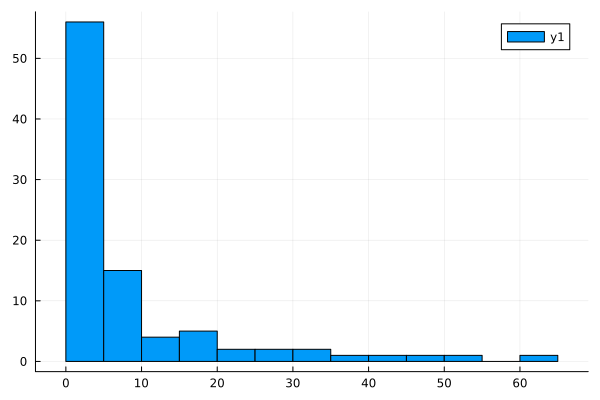

In [82]:
using Distributions, Plots
dist = TDist(3)
realisations = rand(dist, 160000)
p = 1/(40*40)
threshold = quantile(dist, 1-p)
exceedance = realisations .- threshold
exceedance = exceedance[exceedance .> 0]
histogram(exceedance)

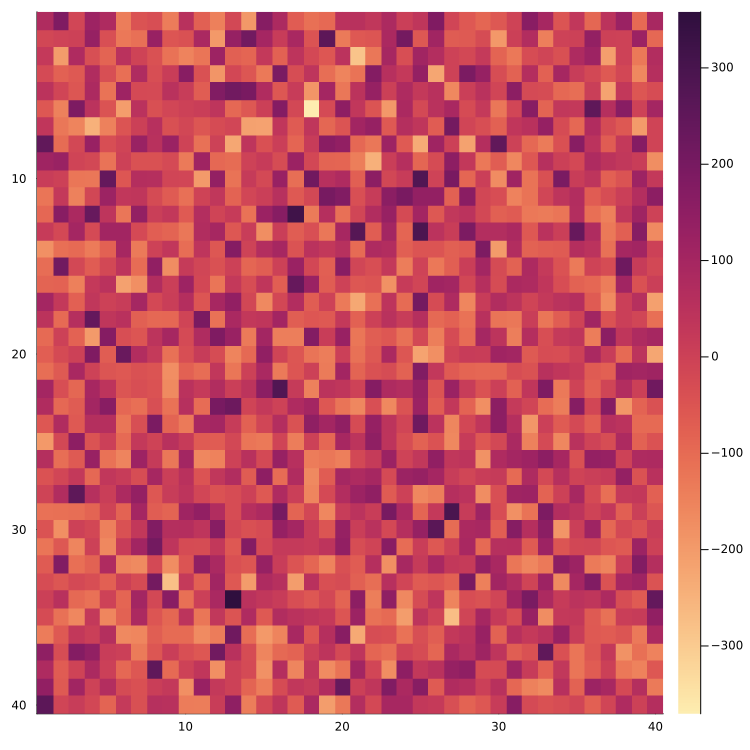

In [83]:
W, P, b = fcn_spatial_weights(dims; boundary = 1, distance = true, bandwidth = 20,  α=2);
X    = rand(Normal(), size(W,1));
Wp   = fcn_spatial_AR(W, S; X = X, γ=0.9, θ=0.3, σ=10);
fcn_plot_heatmap(Wp[b .== 0,20])

In [92]:
result = map(i -> fcn_mc_sim(i, 1000, 0:0.1:50, 0:0.05:1), 1:2);

Completed run 1
Completed run 2


In [93]:
result

2-element Vector{MCResult}:
 MCResult(Result(EfficiencyFrontier([1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [4372.193810902819, 5635.988847676046, 7132.708741826082, 4718.956515704876, 4654.928962508786, 4305.892050619971, 2491.665886659029, 6903.814675571739, 6339.910333510688, 3988.832326098829  …  4262.033065830548, 3608.956467415457, 11199.670343811413, 5655.1038306863065, 5355.867963279465, 4334.422908120888, 5755.346223052666, 4956.923854982844, 6780.188953899197, 5864.211346644859], [0], fcn_optim_ev), EfficiencyFrontier([1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [4203.683117741066, 5746.5754868661825, 7163.411646718165, 5096.785894954385, 4381.055357068152, 4476.21188245148, 2419.3159673642367, 6738.791274180866, 6524.270712528346, 4459.703598173266  …  4655.684591659828, 3338.820408129939, 11316.756008132075, 5885.628307033191, 5331.064491317958, 4427.8305

In [94]:
q=1
max_ce_id_mstd = map(i -> findmax(i)[2][2], result[q].ce.mstd)
max_ce_id_cvar = map(i -> findmax(i)[2][2], result[q].ce.cvar)
contiguity_mstd = zeros(length(max_ce_id_mstd));
contiguity_cvar = zeros(length(max_ce_id_cvar));

for (i,x)=enumerate(max_ce_id_mstd)
    contiguity_mstd[i] = result[q].ef.mstd.solutions[:,x]' * result[q].L.W * result[q].ef.mstd.solutions[:,x]
end

for (i,x)=enumerate(max_ce_id_cvar)
    contiguity_cvar[i] = result[q].ef.cvar.solutions[:,x]' * result[q].L.W * result[q].ef.cvar.solutions[:,x]
end

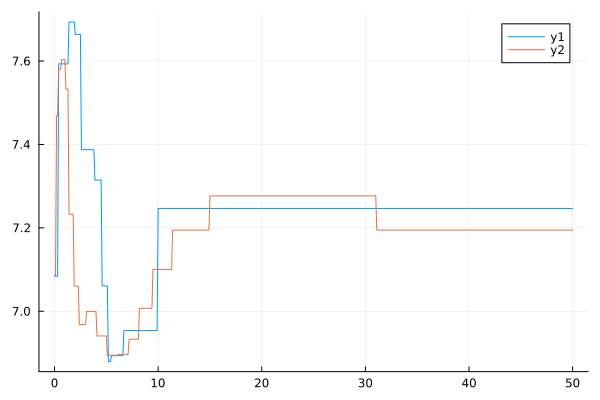

In [95]:
α=0:0.1:50
plot(α, contiguity_cvar)
plot!(α, contiguity_mstd)

In [96]:
(result[q].L.SS)' * (result[q].ef.mstd.solutions[:,1]) .> 25

1601-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

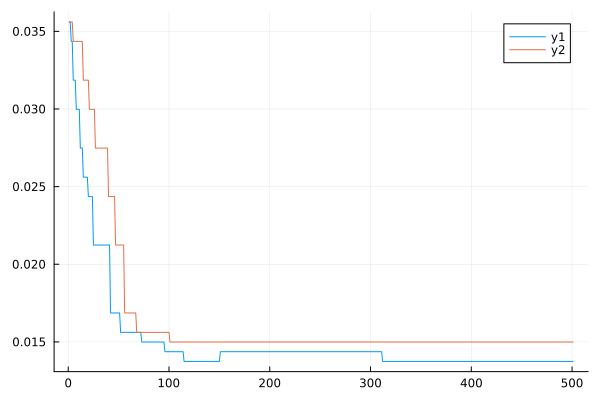

In [97]:
Q = 1:2
likelihood_shock_mstd = zeros(length(max_ce_id_mstd), length(Q));
likelihood_shock_cvar = zeros(length(max_ce_id_cvar), length(Q));
threshold = 60;
for q=Q
    for (i,x)=enumerate(max_ce_id_mstd)
        likelihood_shock_mstd[i,q] = mean(((result[q].L.R .< 1e-5)' * result[q].ef.mstd.solutions[:,x]) .> threshold)
    end

    for (i,x)=enumerate(max_ce_id_cvar)
        likelihood_shock_cvar[i,q] = mean(((result[q].L.R .< 1e-5)' * result[q].ef.mstd.solutions[:,x]) .> threshold)
    end
end
plot(likelihood_shock_mstd[:,1])
plot!(likelihood_shock_cvar[:,1])

In [98]:
include("code/functions/mc-sim-functions.jl")
#fcn_write_shock_exposure(result, "baseline")
#fcn_write_contiguity(result, "baseline")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23


fcn_save_results (generic function with 1 method)

In [99]:
sum(result[q].L.R .< 1e-5, dims = 1)

1×1601 Matrix{Int64}:
 812  654  705  718  809  752  1015  …  645  859  700  712  742  525  702

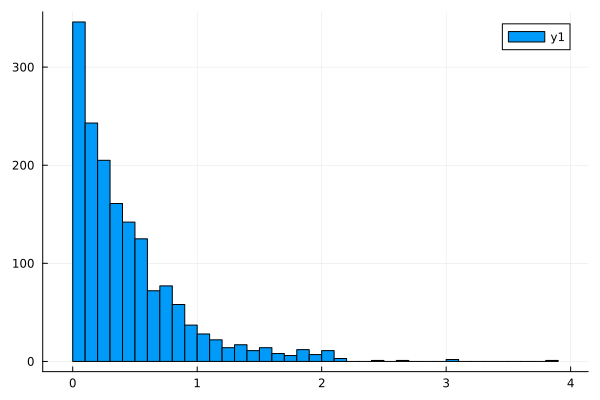

In [100]:
dist = Distributions.TDist(20);
realisations = rand(dist, 160000);
threshold = quantile(dist, 1-0.01);
exceedance = realisations .- threshold
histogram(exceedance[exceedance .> 0])


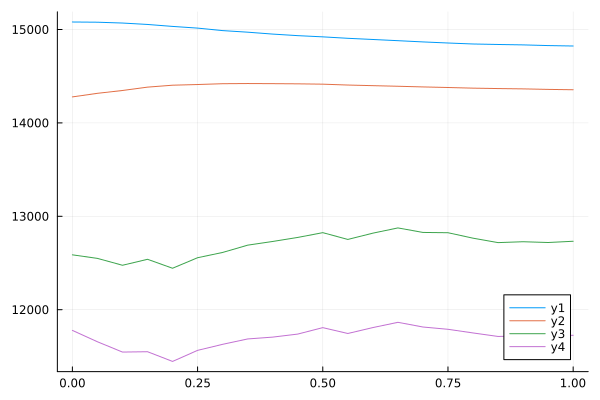

In [102]:
plot(0:0.05:1, result[1].ce.cvar[1]')
plot!(0:0.05:1, result[1].ce.cvar[50]')
plot!(0:0.05:1, result[1].ce.cvar[200]')
plot!(0:0.05:1, result[1].ce.cvar[501]')

In [103]:
cvar_ce = mapreduce(permutedims, hcat, result[1].ce.cvar)
CSV.write("output/cvar_ce.csv", DataFrame(cvar_ce, :auto))

"output/cvar_ce.csv"

In [25]:
using JLD2, StatsBase, Plots
result = load("../../output/result.jld2");
result = result["result_array"][1];

LoadError: ArgumentError: No file exists at given path: ../../output/result.jld2

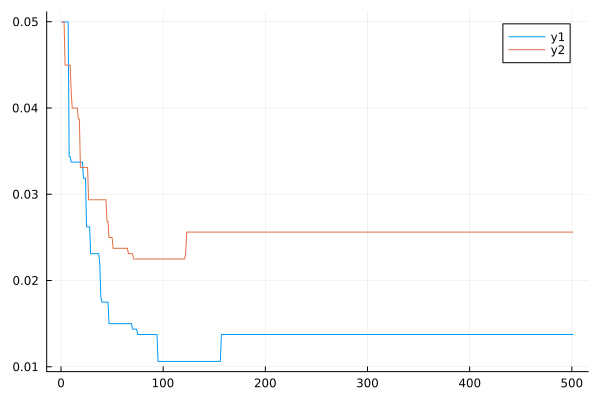

In [ ]:
q=1
Q = 1:5;
α = 0:0.1:50;
mstd_downside_crra = zeros(length(α), length(Q));
cvar_downside_crra = zeros(length(α), length(Q));
mstd_upside_crra = zeros(length(α), length(Q));
cvar_upside_crra = zeros(length(α), length(Q));
for q=Q

    max_ce_id_mstd = map(i -> findmax(i)[2][2], result[q].ce.mstd)
    max_ce_id_cvar = map(i -> findmax(i)[2][2], result[q].ce.cvar)
    lb = percentile(result[q].ef.ev.returns, 5);
    ub = percentile(result[q].ef.ev.returns, 95);

    cvar_downside = mean(result[q].ef.cvar.returns .< lb, dims = 1)'
    mstd_downside = mean(result[q].ef.mstd.returns .< lb, dims = 1)'
    cvar_upside = mean(result[q].ef.cvar.returns .> ub, dims = 1)'
    mstd_upside = mean(result[q].ef.mstd.returns .> ub, dims = 1)'

    for (i,x)=enumerate(max_ce_id_mstd)
        mstd_downside_crra[i,q] = mstd_downside[x]
        mstd_upside_crra[i,q] = mstd_upside[x]
    end

    for (i,x)=enumerate(max_ce_id_cvar)
        cvar_downside_crra[i,q] = cvar_downside[x]
        cvar_upside_crra[i,q] = cvar_upside[x]
    end
end

plot(median(cvar_downside_crra, dims = 2));
plot!(median(mstd_downside_crra, dims = 2))

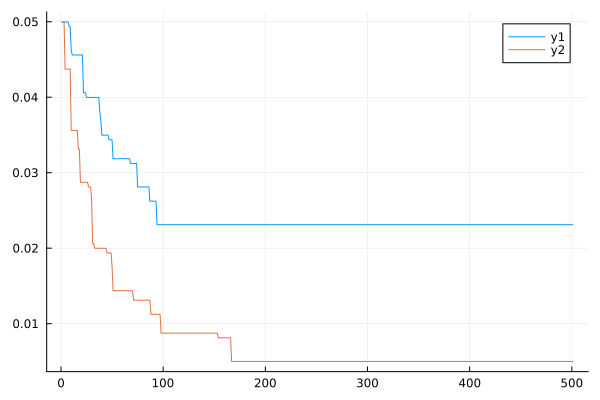

In [ ]:
plot(median(cvar_upside_crra, dims = 2));
plot!(median(mstd_upside_crra, dims = 2))

In [ ]:
include("../functions/mc-sim-functions.jl")
#fcn_write_shock_exposure(result, "baseline", 50:2:100, 1:2)
fcn_write_contiguity(result, "baseline", 1:2)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-23


"/users/frankiecho/Documents/Github/lds-mc-julia/output/contiguity_baseline_2.csv"

In [ ]:
q = 1
t = 50
ev_rv_likelihood = mean(((result[q].L.R .< 1e-5)' * result[q].ef.ev_rv.solutions) .> t)

0.0693316677076827